¡Hola, Christian!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Christian! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un cientifico de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

In [1]:
#Librerias
import pandas as pd
import numpy as np
import math as mt
from scipy import stats as st
from math import factorial
import matplotlib.pyplot as plt

In [2]:
#read data base
df = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15755,Disney Sports Basketball,GBA,2002.0,Sports,0.01,0.00,0.00,0.00,73.0,tbd,E
4117,NHL 16,XOne,2015.0,Sports,0.38,0.05,0.00,0.05,80.0,6,E10+
16238,Fernbus Simulator,PC,2016.0,Simulation,0.00,0.01,0.00,0.00,NaN,tbd,NaN
5689,LEGO Marvel's Avengers,X360,2016.0,Action,0.18,0.11,0.00,0.03,NaN,5.7,E10+
5844,Chaos Legion,PS2,2003.0,Action,0.15,0.12,0.00,0.04,65.0,8.2,T
7702,Big Mutha Truckers 2,PS2,2005.0,Racing,0.10,0.07,0.00,0.03,51.0,2.1,M
15458,Dance Dance Revolution Extra Mix,PS,2001.0,Simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN
6620,Silent Hunter 5: Battle of the Atlantic,PC,2010.0,Simulation,0.00,0.21,0.00,0.05,62.0,3.5,T
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
13586,King Arthur,GC,2004.0,Action,0.03,0.01,0.00,0.00,60.0,tbd,T


In [5]:
print(df.describe())

       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000  


# Primer vistazo a la informacion:
Tenemos un total de 16714 entradas
'Name' Tiene 1 dato nulo
'Year of release' tiene 268 datos nulos y por alguna razon pandas lo detecta como flotante?! debo cambiar eso
'Genre' tiene un dato nulo
'Critic_Score' tiene 8577 datos nulos
'User_Score' tiene 6700 datos nulos, ademas, tiene algunos datos como 'TBD'
'Rating' tiene 6765 datos nulos

In [6]:
# Columnas en minusculas
df.columns = df.columns.str.lower()
print(df['year_of_release'].median())

2007.0


In [7]:
# Convertir los datos en los tipos necesarios
df['year_of_release'] = df['year_of_release'].fillna(2007).astype(int)
df = df.dropna(subset=['name', 'genre'])

# Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

Hasta ahora solo e tenido la necesidad de cambiar una sola columna, que fue la de year of release
utilice fillna(2007) por dos razones, 1.- para hacer astype primero debo rellenar los datos
2.- use la mediana para rellenar los datos y no afectar mucho mi dataframe

# Si es necesario, elige la manera de tratar los valores ausentes:
# Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

Los valores ausentes de "year_of_release" ya fueron tratados y se expuso la razon en el cuadro anterior
Name y Genre si podria usar dropna porque solamente tienen 2 datos nulos cada uno y son la misma fila (lo reivse)
para critic_score, user_score y rating no podria utilizar dropna ni fillna, la diferencia es muchisima
faltan muchos datos, por ahora lo mejor que puedo hacer es dejarlo asi 

# ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Para Critic_score podria ser que haya mucho dato ausente porque no todos los juegos son juegos de renombre?
es facil imaginar un Mario, un Sonic, pero mucho juegos Indi quiza al estar en 
la lista por eso no tiene calificacion lo cual explicaria porque si tenemos muchas mas criticas en user_score



In [8]:
#Presta atención a la abreviatura TBD: significa "to be determined" (a determinar).
# Especifica cómo piensas manejar estos casos.

df['user_score'].value_counts()
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Para este caso decidi eliminar TBD ya que me es lo mismo TBD a tenerlo como Nan, ademas de que necesito tener user_score como float

In [9]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 


# Paso 3. Analiza los datos 

In [10]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
df['year_of_release'].value_counts().sort_index(ascending=False)

2016     502
2015     606
2014     581
2013     544
2012     653
2011    1136
2010    1255
2009    1426
2008    1427
2007    1466
2006    1006
2005     939
2004     762
2003     775
2002     829
2001     482
2000     350
1999     338
1998     379
1997     289
1996     263
1995     219
1994     121
1993      60
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      46
1980       9
Name: year_of_release, dtype: int64

De acuerdo a la informacion tal parece que tuvimos el pico mas alto de juegos producidos entre
2007 - 2009 despues de eso empezo a disminuir la cantidad de juegos producidos.
Teorizo que debido a que ahora los juegos tardan mas en hacerse, la cantidad de juegos al año a disminuido.

    year_of_release platform  total_sales
0              1985       DS         0.02
1              2000      PS2        39.17
2              2001      PS2       166.43
3              2002      PS2       205.38
4              2003      PS2       184.31
5              2004       DS        17.27
6              2004      PS2       211.81
7              2005       DS       130.14
8              2005      PS2       160.66
9              2005     X360         8.25
10             2006       DS       119.81
11             2006      PS2       103.42
12             2006      PS3        20.96
13             2006      Wii       137.15
14             2006     X360        51.62
15             2007       DS       150.28
16             2007      PS2        98.20
17             2007      PS3        81.50
18             2007      Wii       169.10
19             2007     X360       105.59
20             2008       DS       145.31
21             2008      PS2        53.90
22             2008      PS3      

<function matplotlib.pyplot.show(close=None, block=None)>

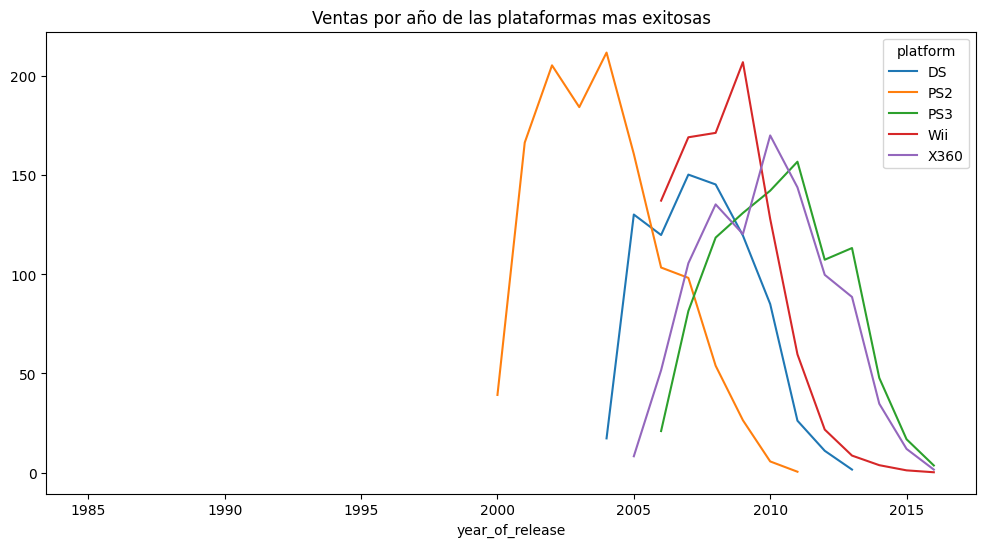

In [11]:
#Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
top_platforms= df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
df_top = df[df['platform'].isin(top_platforms.index)]
sells_per_year = df_top.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
print(sells_per_year)

tabla = sells_per_year.pivot(index='year_of_release', columns='platform', values='total_sales')
tabla.plot(figsize= (12, 6))
plt.title('Ventas por año de las plataformas mas exitosas')
plt.xlabel= ('año')
plt.ylabel= ('Ventas(millones)')
plt.show

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
De acuerdo a la informacion, al parecer tienen un promedio de desaparecer de 10 años.

In [12]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [13]:
df_model = df[df['year_of_release'] <= 2016]
df_model.dropna()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16663,E.T. The Extra-Terrestrial,GBA,2001,Action,0.01,0.00,0.00,0.00,46.0,2.4,E,0.01
16673,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01


In [14]:
df['success'] = df['total_sales'] >= 1.0
df_model = df[df['year_of_release'] <= 2016].copy()

In [15]:
print(df_model.groupby('genre')['success'].mean().sort_values(ascending=False))
print()
# Éxito por plataforma
print(df_model.groupby('platform')['success'].mean().sort_values(ascending=False))
print()
# Éxito por rating ESRB
print(df_model.groupby('rating')['success'].mean().sort_values(ascending=False))
print()
# Relación entre crítica y éxito
print(df_model[['critic_score', 'success']].corr())

genre
Platform        0.219595
Shooter         0.193500
Racing          0.146517
Fighting        0.146054
Role-Playing    0.136182
Sports          0.130324
Action          0.124963
Simulation      0.106529
Misc            0.096571
Puzzle          0.094828
Strategy        0.045388
Adventure       0.031466
Name: success, dtype: float64

platform
NES     0.755102
GB      0.561224
GEN     0.407407
XOne    0.206478
SNES    0.200837
PS4     0.198980
2600    0.195489
X360    0.187005
PS3     0.179564
PS      0.172097
SCD     0.166667
N64     0.159875
PS2     0.150393
WiiU    0.136054
Wii     0.118939
DC      0.115385
3DS     0.092308
GBA     0.085158
GC      0.084532
PC      0.070842
DS      0.065086
XB      0.064320
PSP     0.047146
SAT     0.017341
PSV     0.016279
3DO     0.000000
PCFX    0.000000
TG16    0.000000
WS      0.000000
NG      0.000000
GG      0.000000
Name: success, dtype: float64

rating
AO      1.000000
K-A     0.666667
M       0.226488
E       0.132832
T       0.130024
E10+

In [16]:
print(df_model.groupby(['genre', 'platform'])['success'].mean().sort_values(ascending=False))
print()
df_model[df_model['critic_score'] >= 85].groupby('genre')['success'].mean()

genre       platform
Shooter     GB          1.0
Racing      GB          1.0
Misc        NES         1.0
Adventure   NES         1.0
Racing      NES         1.0
                       ... 
Simulation  DC          0.0
Misc        SAT         0.0
Simulation  3DO         0.0
            2600        0.0
Strategy    XOne        0.0
Name: success, Length: 293, dtype: float64



genre
Action          0.619318
Adventure       0.250000
Fighting        0.531915
Misc            0.555556
Platform        0.482759
Puzzle          0.384615
Racing          0.525000
Role-Playing    0.524194
Shooter         0.563910
Simulation      0.400000
Sports          0.393035
Strategy        0.170213
Name: success, dtype: float64

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Tomando como base mi grafica sobre ventas por año de las consolas mas exitosas e decidido tomar como base de 2006 a 2016, los ultimos 10 años.
Razon de esto, en el top 5 de las consolas mas vendidas tengo ps2 y ds, pero como podemos observar esas consolas ya dejaron de vender videojuegos por lo tanto las separare de mi grafica, ahora solo me queda el top 3 actuales que aun venden videojuegos (wii, xbox360 y ps3), estas consolas arrancaron entre 2005 y 2006 hasta el año donde tengo datos 2016, asi que tomare los datos desde ahi

In [17]:
df_model_2 = df[df['year_of_release'] >= 2006].copy()
print(df_model_2)

                                                   name platform  \
0                                            Wii Sports      Wii   
2                                        Mario Kart Wii      Wii   
3                                     Wii Sports Resort      Wii   
6                                 New Super Mario Bros.       DS   
7                                              Wii Play      Wii   
...                                                 ...      ...   
16709  SCORE International Baja 1000: The Official Game      PS2   
16710                     Samurai Warriors: Sanada Maru      PS3   
16711                                  LMA Manager 2007     X360   
16712                           Haitaka no Psychedelica      PSV   
16714                               Winning Post 8 2016      PSV   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
0                 2006      Sports     41.36     28.96      3.77         8.45   
2                 200

In [18]:
df_model_2.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
X360    963.17
PS3     939.65
Wii     907.51
DS      658.69
PS4     314.14
PS2     288.01
3DS     259.00
PSP     243.15
PC      167.18
XOne    159.32
WiiU     82.19
PSV      54.07
XB       16.94
GC       13.73
GBA      13.65
2600     10.50
PS        3.28
GB        1.03
N64       0.67
DC        0.06
Name: total_sales, dtype: float64

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Tomando en cuenta estos anos, el X360 y la PS3 aumentaron drasticamente junto con la Wii, la DS disminuyo bastnte y la PS4 va en aumento y la PS2 cayo drasticmente. para mi las plataformas mas rentables serian x360, ps3 y la Wii

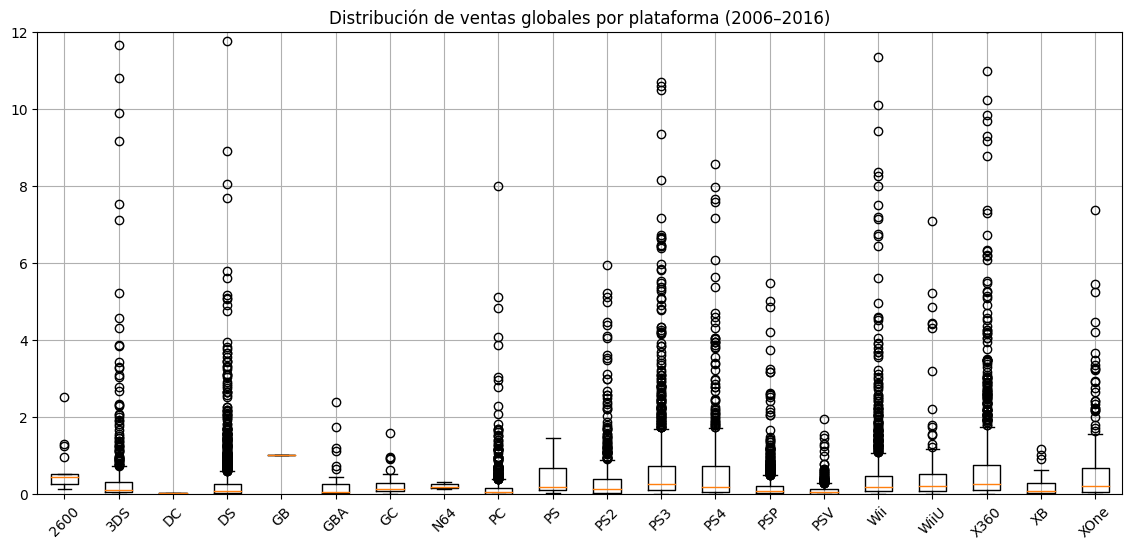

In [19]:
df_box = df_model_2[['platform', 'total_sales']]
datos_agrupados = [grupo['total_sales'].values for _, grupo in df_box.groupby('platform')]

# Extraer etiquetas ordenadas
etiquetas = df_box.groupby('platform').groups.keys()

# Crear el boxplot
plt.figure(figsize=(14, 6))
plt.boxplot(datos_agrupados, labels=etiquetas, showfliers=True)
plt.title('Distribución de ventas globales por plataforma (2006–2016)')
plt.xticks(rotation=45)
plt.ylim(0, 12)  # Para evitar distorsión por outliers
plt.grid(True)

plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

Describe tus hallazgos:
1.- La Wii muestra la mayor dispersion, con valores atipicos que superan los 80 millones de unidades vendidas, indicando algunos grandes exitos en esa plataforma

2.- La PS3 y la Xbox360 tienen cajas mas amplias, lo cual nos indican una mayor mediana de ventas y una alta concentracion de titulos con ventas moderadas a altas.

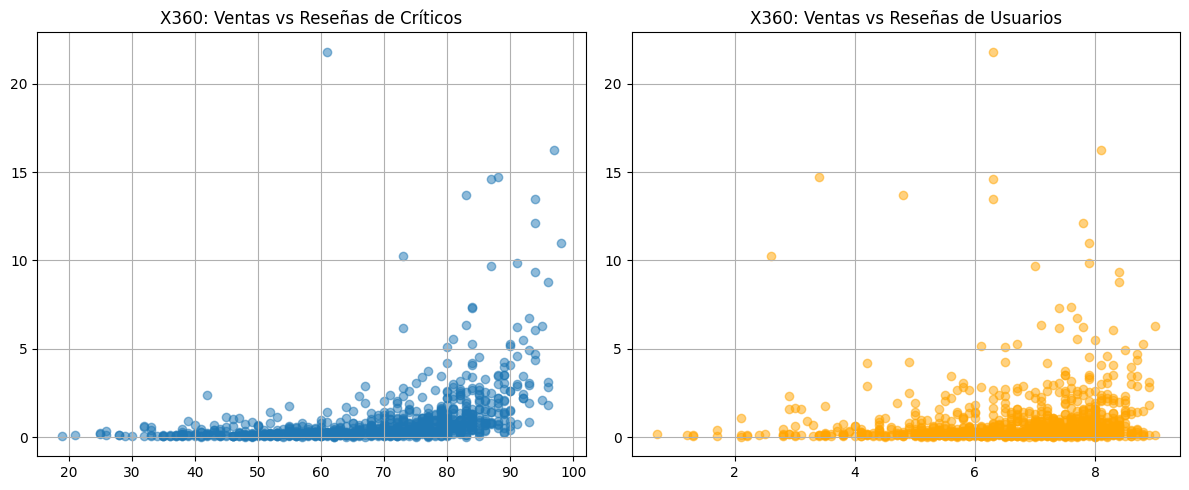

Correlación entre critic_score y total_sales (X360): 0.394
Correlación entre user_score y total_sales (X360): 0.114


In [20]:
x360_df = df_model[df_model['platform'] == 'X360']

x360_critic = x360_df[['critic_score', 'total_sales']].dropna()
x360_user = x360_df[['user_score', 'total_sales']].dropna()

x360_user['user_score'] = pd.to_numeric(x360_user['user_score'], errors='coerce')
x360_user = x360_user.dropna()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x360_critic['critic_score'], x360_critic['total_sales'], alpha=0.5)
plt.title('X360: Ventas vs Reseñas de Críticos')
plt.grid(True)

# Gráfico de dispersión: User Score
plt.subplot(1, 2, 2)
plt.scatter(x360_user['user_score'], x360_user['total_sales'], alpha=0.5, color='orange')
plt.title('X360: Ventas vs Reseñas de Usuarios')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calcular correlaciones
cor_critic = x360_critic['critic_score'].corr(x360_critic['total_sales'])
cor_user = x360_user['user_score'].corr(x360_user['total_sales'])

print(f'Correlación entre critic_score y total_sales (X360): {cor_critic:.3f}')
print(f'Correlación entre user_score y total_sales (X360): {cor_user:.3f}')

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

En la plataforma Xbox360 tenemos una correlacion moderada positiva con los critic score lo que quiere decir que juegos mejor evaluados tienen a vender mas, sin embargo a no ser una correlacion fuerte, esto nos dice que existen otros factores que influyen al respecto, pero tomar como buenas criticas en un juego puede ser un buen inicio.

In [21]:
plataformas_objetivo = ['Wii', 'X360', 'PS3', 'PS4', 'XOne']

# Filtrar solo las plataformas relevantes
df_filtrado = df_model[df_model['platform'].isin(plataformas_objetivo)]

# Quedarse con los juegos que están en más de una de estas plataformas
juegos_multiplataforma = df_filtrado[df_filtrado.duplicated('name', keep=False)]

# Crear tabla pivote: cada juego con sus ventas por plataforma
pivot_multiplataforma = juegos_multiplataforma.pivot_table(
    index='name',
    columns='platform',
    values='total_sales'
)

# Opcional: filtrar juegos que estén al menos en 2 plataformas de la lista
pivot_multiplataforma = pivot_multiplataforma.dropna(thresh=2)

# Mostrar los primeros ejemplos
pivot_multiplataforma.head(26)

platform,PS3,PS4,Wii,X360,XOne
name,,,,,
007: Quantum of Solace,1.15,NaN,0.65,1.48,NaN
2010 FIFA World Cup South Africa,1.23,NaN,0.43,0.85,NaN
2014 FIFA World Cup Brazil,0.61,NaN,NaN,0.43,NaN
428: Fuusa Sareta Shibuya de,0.02,NaN,0.13,NaN,NaN
50 Cent: Blood on the Sand,0.20,NaN,NaN,0.21,NaN
7 Days to Die,NaN,0.14,NaN,NaN,0.05
AC/DC LIVE: Rock Band Track Pack,0.24,NaN,0.26,0.23,NaN
Ace Combat: Assault Horizon,0.74,NaN,NaN,0.49,NaN
Adventure Time: Explore the Dungeon Because I Don't Know!,0.04,NaN,NaN,0.08,NaN


Comparando las ventas de X360 y PS3 las diferencias varian segun el titulo, sin embargo no hay una diferencia significativa entre
una y otra. algunos son mas exitosos en la X360 y otros en la PS3, esto sugiere que la eleccion de consola no garantiza pr si una mayor volumen de ventas

In [22]:
print(df_model.groupby(['genre', 'platform'])['success'].mean().sort_values(ascending=False))
print()
df_model[df_model['critic_score'] >= 85].groupby('genre')['success'].mean()

genre       platform
Shooter     GB          1.0
Racing      GB          1.0
Misc        NES         1.0
Adventure   NES         1.0
Racing      NES         1.0
                       ... 
Simulation  DC          0.0
Misc        SAT         0.0
Simulation  3DO         0.0
            2600        0.0
Strategy    XOne        0.0
Name: success, Length: 293, dtype: float64



genre
Action          0.619318
Adventure       0.250000
Fighting        0.531915
Misc            0.555556
Platform        0.482759
Puzzle          0.384615
Racing          0.525000
Role-Playing    0.524194
Shooter         0.563910
Simulation      0.400000
Sports          0.393035
Strategy        0.170213
Name: success, dtype: float64

De acuerdo ala informacion, el genero de Accion parece ser el mas rentable por lejos entre los generos de videojuegos segun los datos
recolectados desde el 2006 al 2016.
Seguido por los juegos de pelea, de disparo y juego de roles.

##Paso 4. Crea un perfil de usuario para cada región##

In [23]:
ventas_por_plataforma = df_model.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Ordenar y obtener las 5 principales plataformas por región
top_na = ventas_por_plataforma['na_sales'].sort_values(ascending=False).head(5)
top_eu = ventas_por_plataforma['eu_sales'].sort_values(ascending=False).head(5)
top_jp = ventas_por_plataforma['jp_sales'].sort_values(ascending=False).head(5)

# Mostrar resultados
print("Top 5 plataformas en NA:\n", top_na, "\n")
print("Top 5 plataformas en EU:\n", top_eu, "\n")
print("Top 5 plataformas en JP:\n", top_jp)

Top 5 plataformas en NA:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64 

Top 5 plataformas en EU:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64 

Top 5 plataformas en JP:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


Tenemos en las 3 listas que aparece la PS2 y PS3 aprece en el top 5 de las listas de auropa y norte america.
En norteamerica y europa aparece la X360 en el top 5 pero no en japon (obvio que ya la X360 es de Microsoft y es empresa americana, lo cual explica porque no es tan popular en japon, ya que ellos son mas de comprar producto nacional, lo cual
tambien explica porque la lista de las 5 plataformas mas vendidas en japon es tan diferente a la del resto de las listas)


In [24]:
ventas_genero = df_model.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum()

# Ordenar por ventas globales (total_sales)
top_generos = ventas_genero.sort_values('total_sales', ascending=False).head(5)

# Mostrar los 5 géneros más vendidos globalmente
print(top_generos)

              na_sales  eu_sales  jp_sales  total_sales
genre                                                  
Action          879.01    519.13    161.43      1744.17
Sports          684.43    376.79    135.54      1331.27
Shooter         592.24    317.34     38.76      1052.45
Role-Playing    330.81    188.71    355.41       934.56
Platform        445.50    200.35    130.83       827.77


Tenemos que el genero de accion y de deportes es el mas popular tanto en norteamerica y europa
Mientras que en Japon la lista en muy diferente donde a los japoneses prefieren por mucho los juegos de rol 
Aun asi en cuento a ventas totales juegos de accion, deportes y disparon estan en el top 3 de juegos mas vendidos mundialmente

In [25]:
ventas_rating = df_model.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Ordenar de mayor a menor en cada región (opcional)
ventas_rating_sorted = ventas_rating.sort_values(by='na_sales', ascending=False)

print(ventas_rating_sorted)

        na_sales  eu_sales  jp_sales
rating                              
E        1292.99    710.25    198.11
T         759.75    427.03    151.40
M         748.48    483.97     64.24
E10+      353.32    188.52     40.20
K-A         2.56      0.27      1.46
EC          1.53      0.11      0.00
AO          1.26      0.61      0.00
RP          0.00      0.08      0.00


In [26]:
De acuerdo a la informacion, la tendencia para ser muy similar de acuerdo a la region, los juegos E (For Everyone) parecen ser lo mas 
ventas tienen seguidos por los T (Teen)
Conforme la clasificacion va aumentando las ventas parecen ir disminuyendo.

SyntaxError: invalid syntax (2754393260.py, line 1)

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

##Paso 5

Hipótesis nula (H0): Las medias de user_score para Xbox One y PC son iguales.
Hipótesis alternativa (h1): Las medias de user_score para Xbox One y PC son diferentes.

In [ ]:
xone_scores = df_model[(df_model['platform'] == 'XOne') & (df_model['user_score'].notna())]['user_score']
pc_scores = df_model[(df_model['platform'] == 'PC') & (df_model['user_score'].notna())]['user_score']

t_stat, p_value = st.ttest_ind(xone_scores, pc_scores, equal_var=False)  # Welch's t-test

print(f'Estadístico t: {t_stat:.3f}')
print(f'Valor p: {p_value:.3f}')

Se realizo la prueba de hipotesis para comparar las calificaciones promedio de los usuarios
Los resultados al ser p_value menos a .05 podemos rechazar la hipotesis nula
por lo tanto h1 =  Las medias de user_score para Xbox One y PC son diferentes.

Hipótesis nula (H0): Las medias de user_score para Acción y Deportes son iguales.

Hipótesis alternativa (H1): Las medias de user_score para Acción y Deportes son diferentes.

In [27]:
accion_scores = df_model[(df_model['genre'] == 'Action') & (df_model['user_score'].notna())]['user_score']
deportes_scores = df_model[(df_model['genre'] == 'Sports') & (df_model['user_score'].notna())]['user_score']

var_accion = accion_scores.var()
var_deportes = deportes_scores.var()
print(f"Varianza Action: {var_accion:.3f}")
print(f"Varianza Sports: {var_deportes:.3f}")

levene_stat, levene_p = st.levene(accion_scores, deportes_scores)
print(f"Prueba de Levene - Estadístico: {levene_stat:.3f}, Valor p: {levene_p:.3f}")

if levene_p > 0.05:
    equal_var = True
    print("No se rechaza la hipótesis nula: las varianzas son iguales.")
else:
    equal_var = False
    print("Se rechaza la hipótesis nula: las varianzas son diferentes.")

t_stat, p_value = st.ttest_ind(accion_scores, deportes_scores, equal_var=equal_var)
print(f'Prueba t - Estadístico t: {t_stat:.3f}, Valor p: {p_value:.3f}')

Varianza Action: 2.032
Varianza Sports: 2.597
Prueba de Levene - Estadístico: 14.133, Valor p: 0.000
Se rechaza la hipótesis nula: las varianzas son diferentes.
Prueba t - Estadístico t: 1.577, Valor p: 0.115


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xone_scores, pc_scores)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

 <div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Sigue disfrutando los siguientes cursos

H0 = los promedios de usuarios para los generos de accion y deportes son iguales
h1 = los promedios de usuarios para los generos de accion y deportes son diferentes

Se comenzo evaluanzo las varianzas que nos dio resultado de:

Varianza Action: 2.032
Varianza Sports: 2.597

despues se aplico la prueba levene para verificar si las varianzas son iguales,
y ya que p_value dio menor a 0.05 se rechaza la hipotesis nula que dice que las varianzas
son iguales, por tanto las varianzas son diferentes.

ahora lo que nos interesa, el promedio para los generos de accion y deportes
el resultado de acuerdo a la prueba t-test fue:

Prueba t - Estadístico t: 1.577, Valor p: 0.115

al ser p_value mayor a 0.05 por tanto no se puede rechazar la hipotesis nula
o sea no hay evidencia estadistica de que el promedio de los juegos de accion y deportes sean diferentes.

 Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

Utilice t-test para muestras independientes
Tenemos dos grupos independientes en ambos casos
se uso el p_calue de 0.05 ya que es el estandar

en ambos casos utilice h0 como que en ambos casos son todos iguales 
y en h1 que ambos casos son diferentes

Ya que h0 siempre debe suponer que no hay ningun cambio y la h1 debe ser el que sea lo contrario a la h0

Como conclusion

Sugiero que si se va a lanzar un juego que sea de Clasificacion E 
Que sea de accion / deportes y/o de disparos ya que son los generos mas vendidos
sugiero que se utilice ya sea xbox360 o ps3 para lanzar el videojuego ya que tenemos evidencia de mayor numero de ventas

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Christian, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>